# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use pandas, Matplotlib, and numpy for data analysis and manipulation

In [1]:
# import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape    # rows, cols

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# lets find out ho many of each class are there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

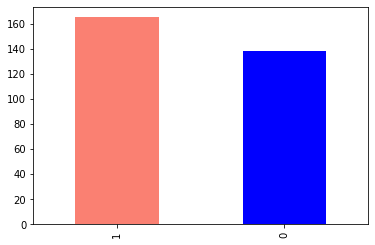

In [5]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'blue'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare the target and sex columns
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

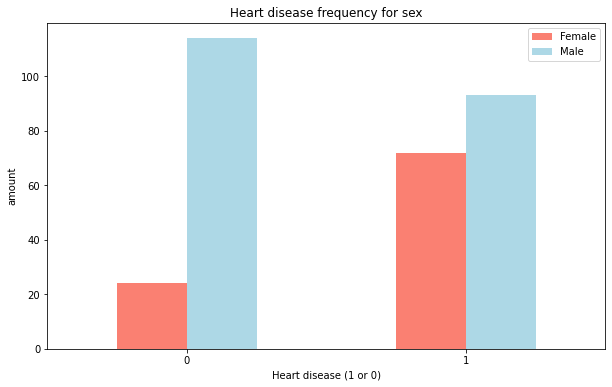

In [11]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize = (10,6),  # width, height
                                   color = ['salmon', 'lightblue'])

plt.title('Heart disease frequency for sex')
plt.xlabel('Heart disease (1 or 0)')
plt.ylabel('amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation =0 )

### Age vs max heart rate for heart disease

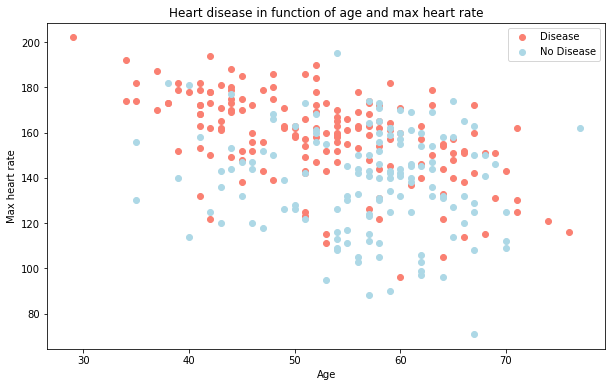

In [12]:
# create another figure
plt.figure(figsize=(10, 6))

# scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = 'salmon')

# scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = 'lightblue')

# add some helpful info
plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No Disease']);

<AxesSubplot:ylabel='Frequency'>

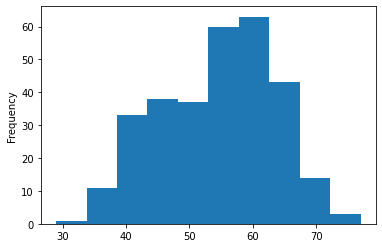

In [13]:
df['age'].plot.hist()

### Heart disease frequency per chest pain type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

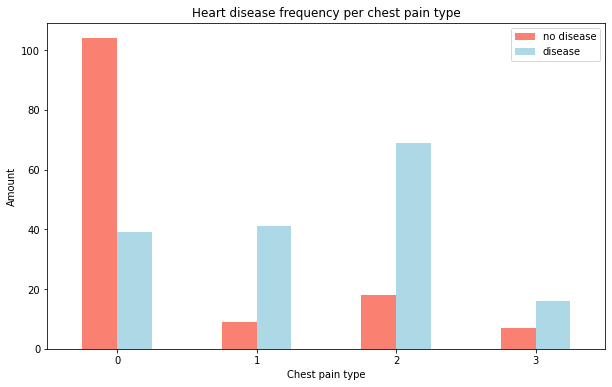

In [15]:
# make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize = (10, 6),
                                  color = ['salmon', 'lightblue'])

# add some communication
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['no disease', 'disease'])
plt.xticks(rotation=0)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.corr()   # will show the correlation matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


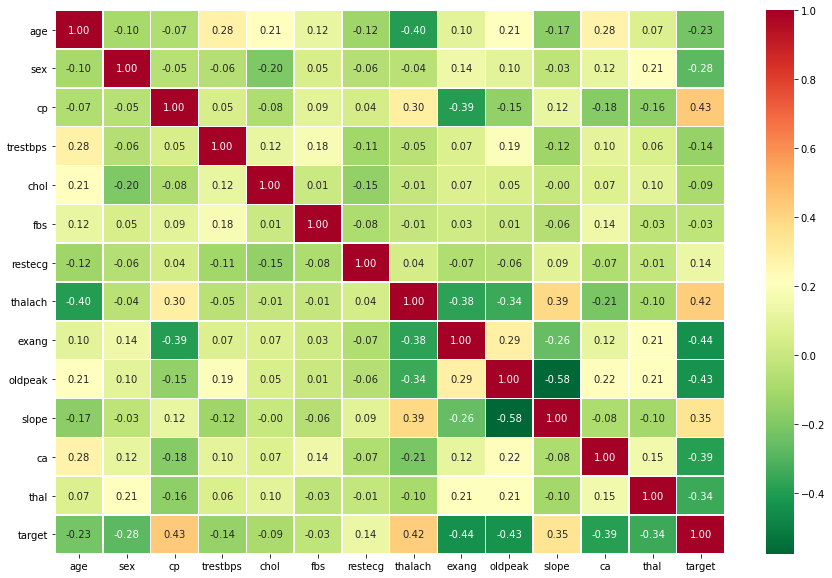

In [18]:
# lets make our correlation matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,       # enable annotations
                linewidths=0.5,    # space between lines
                fmt = '.2f',       # format for 2 decimal places
                cmap = 'RdYlGn_r'    # show in colors[Red, Yellow, Green]
                )

## 5. evaluation

In [19]:

x = df.drop('target', axis = 1)
y = df.target

In [20]:
y, len(y)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64,
 303)

In [21]:
# split the data into train and test sets
np.random.seed(7)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [22]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2


In [23]:
y_train, len(y_train)

(245    0
 267    0
 268    0
 150    1
 168    0
       ..
 211    0
 67     1
 25     1
 196    0
 175    0
 Name: target, Length: 242, dtype: int64,
 242)

Now we have got our data split into training and test sets, its time to build a ML model.
We will train it (find the patterns) on the training set.
we will test it( use the patterns) on the test set

we are goint to try 3 diffrent ML models-
1. Logistic Regression
2. K-Nearest Neighbors classifier
3. Random Forest classifier

In [24]:
# put models in a dictionary
models = {'LogisticRegression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random forest': RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    Fits and evaluates given ML models
    models = a dict of different sklearn ML models
    x_train, x_test, y_train, y_test = training and test sets
    '''
    np.random.seed(8)
    
    # make an empty dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # evaluate the model and append its score to moel_scores empty dict
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores


In [25]:
# trying different different models 
model_scores = fit_and_score(models = models,
                            x_train=x_train,
                             x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\LENOVO\Desktop\sample_project_1\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.7540983606557377,
 'KNN': 0.5573770491803278,
 'Random forest': 0.7213114754098361}

### Model comparision

<AxesSubplot:>

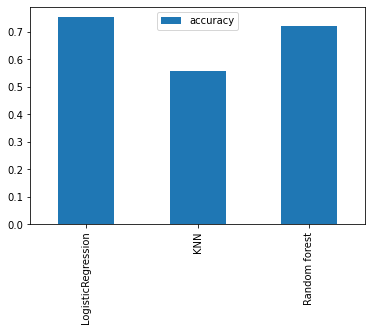

In [26]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

Now we have got our baseline model, and we know a model's 1st predictions arent always what we should based our next steps off. What should we do?

Lets look at the foolowing- 
* Hyperparameter tuning
* Feature importance
* confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [27]:
# lets tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors attribute of the KNeighborsClassifier()
neighbors = range(1, 21)

# setup the KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algorithm
    knn.fit(x_train, y_train)
    
    # test the score of algo and append it to the lists 
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test, y_test))
    
    

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7024793388429752]

In [29]:
 test_scores

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836]

Maximum KNN score on the test data : 67.21311475409836


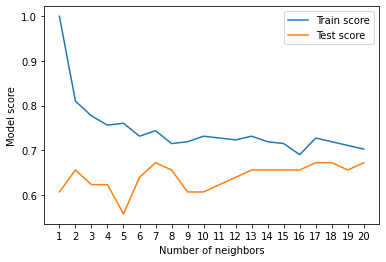

In [30]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
plt.xticks(np.arange(1,21,1))

print(f'Maximum KNN score on the test data : {max(test_scores)*100}')

### hyperparaeter tuning with RandomizedSearchCV

we are going to tune-
* LogisticRegression()
* RandomForestClassifier()
.. Using RandomizedSearchCV

In [31]:
# create a hyperparameter grid for logistic regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# create a hyperparameter grid for random forest classifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

Now we have got the grids for each of our models, lets tune them using RandomizedSearchCV()

In [32]:
# tune logistic regression
np.random.seed(8)

# setup Random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,     # passing the grid here
                               cv = 5,         # 5 fold cross-validation
                               n_iter= 20,
                               verbose=True)

# fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
# finding the best combination of parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [34]:
# evaluating the model with the best hyperparameters
rs_log_reg.score(x_test, y_test)

0.7540983606557377

In [35]:
model_scores

{'LogisticRegression': 0.7540983606557377,
 'KNN': 0.5573770491803278,
 'Random forest': 0.7213114754098361}

In [36]:
# tune Random forest
np.random.seed(8)

# setup Random hyperparameter search for Random forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions= rf_grid,     # passing the grid here
                               cv = 5,         # 5 fold cross-validation
                               n_iter= 20,
                               verbose=True)

# fit random hyperparameter search model
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
# find the best combination
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [39]:
rs_rf.score(x_test, y_test)

0.7049180327868853

In [40]:
model_scores

{'LogisticRegression': 0.7540983606557377,
 'KNN': 0.5573770491803278,
 'Random forest': 0.7213114754098361}

In [41]:
# create a hyperparameter grid for logistic regression
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# tune logistic regression with GridSearchCV()
np.random.seed(8)

# setup Random hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid= log_reg_grid,     # passing the grid here
                               cv = 5,         # 5 fold cross-validation
                               verbose=True)

# fit random hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
# find the best combination
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [43]:
# evaluate the model
gs_log_reg.score(x_test, y_test)

0.7540983606557377

In [44]:
model_scores

{'LogisticRegression': 0.7540983606557377,
 'KNN': 0.5573770491803278,
 'Random forest': 0.7213114754098361}

### Evaluating our tuned ML classifier beyond accuracy

* ROC curve and AUC score
* Confusion matric
* classification report
* precision
* Recall
* F1 score
and it would be great if cross-validation was used where possible

To make comparisions and evaluate our trained model, 1st we need to make predictions

In [45]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [46]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [47]:
y_test

125    1
57     1
282    0
66     1
114    1
      ..
278    0
138    1
223    0
241    0
22     1
Name: target, Length: 61, dtype: int64

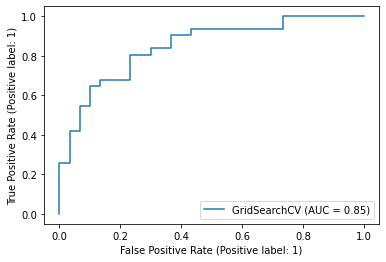

In [48]:
# plot ROC curve and calculate AUC score
plot_roc_curve(gs_log_reg, x_test, y_test)

In [49]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[18 12]
 [ 3 28]]


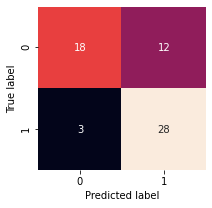

In [50]:
# sns.set(font_size = 1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a beautified conf matrix using seaborns heatmap()
    '''
    fig,ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
                     
plot_conf_mat(y_test, y_preds)

In [51]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



### Calculate evaluation metrics using cross-validation
We are going to calculate precision recall and f1 score of our model and to do so we will be using `cross_val_score`

In [52]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [54]:
# create a new classifier with best params
clf = LogisticRegression(C = 0.38566204211634725,
                        solver='liblinear')

In [58]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8380874316939891

In [60]:
# cross-validated precision
cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8154667272314331

In [61]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [62]:
# cross-validated f1 score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1


0.8614850462777628

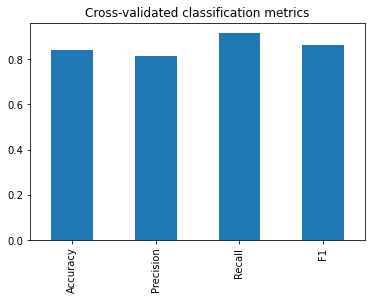

In [64]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics',
                     legend = False);

### feature importance
"Which features contributed the most to the outcomes of the model and how did they contribute?"

    finding feature importance is different for each ML model. One way to find it is to search for (MODEL NAME) feature importance
    
    Lets find the feature importance for our LogisticRegression model

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
# fit an instance of logistic regression
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.38566204211634725,
                        solver= 'liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
# check coef_
clf.coef_           # it will show how the coefficients (of x_train) are contributing to the target column (y_train)

array([[ 0.02197327, -1.18335587,  0.75710264, -0.02334148, -0.0017493 ,
         0.35581907,  0.35391416,  0.03440635, -0.70025878, -0.56110326,
         0.46102557, -0.61500843, -1.02087035]])

In [73]:
# match coeff's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.02197327203299422,
 'sex': -1.1833558736250682,
 'cp': 0.7571026420043102,
 'trestbps': -0.023341481695477156,
 'chol': -0.0017493007024095215,
 'fbs': 0.3558190656304481,
 'restecg': 0.3539141559833727,
 'thalach': 0.034406352895150726,
 'exang': -0.7002587804075295,
 'oldpeak': -0.5611032605259144,
 'slope': 0.461025570397942,
 'ca': -0.6150084337409798,
 'thal': -1.0208703521483862}

<AxesSubplot:title={'center':'Feature Imporatnce'}>

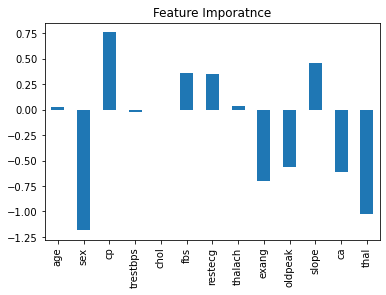

In [74]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = 'Feature Imporatnce', legend = False)

In [75]:

pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [76]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you havent hit the evaluation metric yet, ask youself...
* Could you collect more data?
* could you try a better model? Like CatBoost Or XGBoost
* Could you improve the current models?
* If your model is goos enough ( you have hit your evaluation metric) how would you export it and share it with others?